## **Latihan Generalization in KNN & Decision Tree**

## **Gunakan dataset 'titanic'**

      - Features: 'pclass', 'sex', 'age', 'fare'
      - Target: 'survived'

### - Drop missing value pada features yang digunakan jika ada.
### - Lakukan data splitting dengan proporsi 80:20 dan random_state = 42

### **KNN**
### - Lakukan scaling pada data, lihat nilai akurasinya.
### - Cari nilai K terbaiknya dengan range 1-150. Interpretasikan hasilnya, kaitkan dengan overfitting dan underfitting.

### **Decision Tree**
### - Analisa performa model (overfitting, underfitting, sweet spot) dengan menggunakan hyperparameter berikut:
      - minimum samples split (min_samples_split) dengan range 2-150
      - minimum samples leaf (min_samples_leaf) dengan range 1-150
### - Jelaskan juga apa yang dilakukan hyperparameter tersebut beserta interpretasinya.

## **Import Libraries**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## **Load Dataset**

In [ ]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# drop missing value
df = df.dropna(subset=['age'])

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## **Define X and y**

In [ ]:
X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']

In [ ]:
X.isna().sum()

pclass    0
sex       0
age       0
fare      0
dtype: int64

In [ ]:
y.isna().sum()

0

## **Data splitting**

In [ ]:
X = pd.get_dummies(X, columns=['sex'], drop_first=True)
X

,pclass,age,fare,sex_male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
885,3,39.0,29.1250,0
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
889,1,26.0,30.0000,1


In [ ]:
# splitting
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 42)

# **Model Complexity in KNN**

## **Scaling**

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train) # preprocess fit, diaplikasikan hanya pada data training

X_train_scaled = scaler.transform(X_train) # transform data X_train
X_test_scaled = scaler.transform(X_test) # transform data x_test

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train) # model fit
y_predict_class = knn.predict(X_test_scaled) # model predict

In [ ]:
print('Model accuracy in test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset: 0.7972027972027972


In [ ]:
# Find the best k
k = range(1, 150, 2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)

    y_predict_train = knn.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))

    y_predict_test = knn.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracies.append(acc_score)

    if score < acc_score:
        score = acc_score
        best_k = i

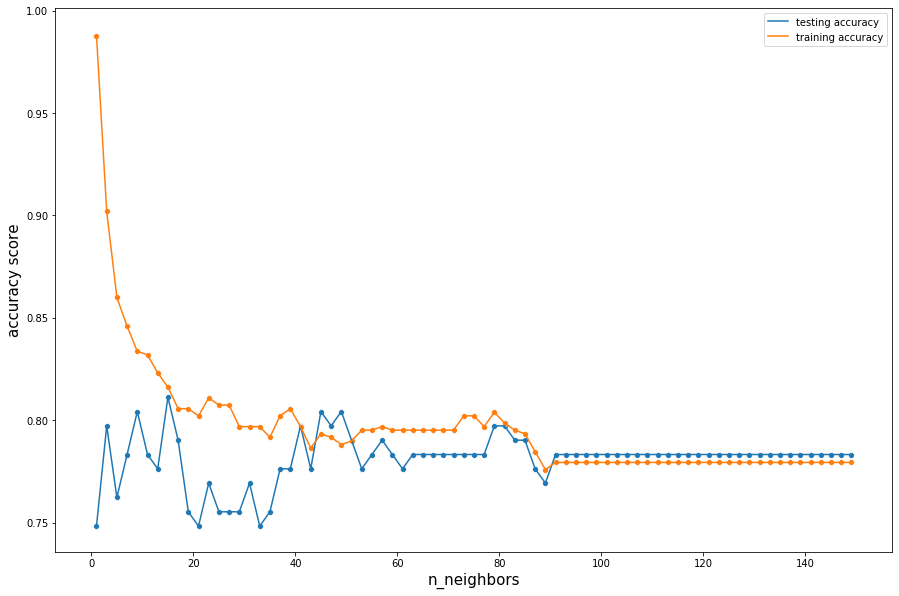

In [ ]:
# Plot the accuracies result
plt.figure(figsize=(15, 10))
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)
plt.legend(['testing accuracy', 'training accuracy'])
plt.xlabel('n_neighbors', size=15)
plt.ylabel('accuracy score', size=15);

In [ ]:
pd.DataFrame(
    {
        'k': k,
        'train accuracy': training_accuracies,
        'test accuracy': testing_accuracies
    }
)[::5]

,k,train accuracy,test accuracy
0,1,0.987741,0.748252
5,11,0.831874,0.783217
10,21,0.802102,0.748252
15,31,0.796848,0.769231
20,41,0.796848,0.797203
25,51,0.789842,0.790210
30,61,0.795096,0.776224
35,71,0.795096,0.783217
40,81,0.798599,0.797203
45,91,0.779335,0.783217


In [ ]:
# The best K with its score
print('Faktor K terbaik =', best_k)
print('Nilai akurasi =', score)

Faktor K terbaik = 15
Nilai akurasi = 0.8111888111888111


## **Interpretasi**

- Saat K = 1, nilai akurasi dari training set = 100%. Hal ini disebabkan karena ketika K = 1, model mengestimasi probabilitas hanya berdasarkan pada satu sample, yaitu tetangga terdekat, yang mana bisa dipilih data itu sendiri sebagai yang terdekatnya. Hal inilah yang menyebabkan error pada K = 1 bernilai 0.

- K = 1 ini sangat sensitif terhadap berbagai distorsi, seperti noise dan outliers, sehingga nilai akurasi pada test set dengan K = 1 pasti berada jauh di bawah nilai akurasi trainingnya. Menaikkan nilai K dapat mengurangi efek dari distorsi ini (ada hubungannya dengan decision boundary).
<br><br>

- K terbaik adalah 15, dapat dilihat pada plot bahwa akurasi data test tertinggi didapat pada K = 15.
- Pada K < 15, nilai akurasi cenderung overfitting (training accuracy >> testing accuracy)
- Pada K > 15, nilai akurasi cenderung fluktuatif dan terdapat trend menurun, serta cenderung menjadi underfitting.

# **Model Complexity in Decision Tree**

## **Minimum samples split**

In [ ]:
split = range(2, 150)
testing_accuracy = []
training_accuracy = []
score = 0

for i in split:
    tree = DecisionTreeClassifier(min_samples_split=i, criterion='entropy')
    tree.fit(X_train, y_train)

    y_predict_train = tree.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))

    y_predict_test = tree.predict(X_test)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracy.append(acc_score)

    if score < acc_score:
        best_split = i
        score = acc_score

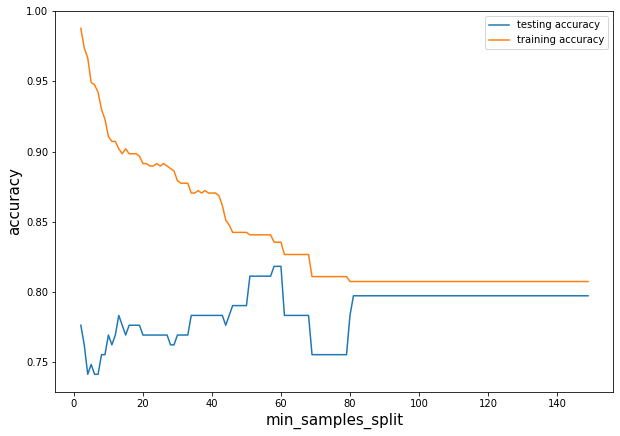

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(split, testing_accuracy)
sns.lineplot(split, training_accuracy)
plt.legend(['testing accuracy', 'training accuracy'])
plt.xlabel('min_samples_split', size=15)
plt.ylabel('accuracy', size=15);

In [ ]:
print('Min Samples Split terbaik =', best_split)
print('Nilai akurasi =', score)

Split terbaik = 58
Nilai akurasi = 0.8181818181818182


In [ ]:
pd.DataFrame(
    {
        'min_samples_split': split,
        'train accuracy': training_accuracy,
        'test accuracy': testing_accuracy
    }
)[::5]

,min_samples_split,train accuracy,test accuracy
0,2,0.987741,0.776224
5,7,0.942207,0.741259
10,12,0.907180,0.769231
15,17,0.898424,0.776224
20,22,0.889667,0.769231
25,27,0.889667,0.769231
30,32,0.877408,0.769231
35,37,0.870403,0.783217
40,42,0.868651,0.783217
45,47,0.842382,0.790210


## **Interpretasi**

- Minimum samples split adalah jumlah minimal sample yang dibutuhkan untuk membuat split baru pada internal node.
- Sebagai contoh, jika min_samples_split = 5, dan ada 7 samples pada internal node, makan split dapat dilakukan.
<br><br>

- Didapat min_samples_split terbaik = 58, itu berarti, dibutuhkan sample minimal sebanyak 58 untuk dapat melakukan split baru pada internal node.
- Semakin rendah nilai min_samples_split (min_samples_split<58), menyebabkan kecenderungan terjadinya overfitting.
- Semakin tinggi nilai min_samples_split (min_samples_split>58), menyebabkan kecenderungan terjadinya underfitting.

## **Minimum samples leaf**

In [ ]:
leaf = range(1, 150)
testing_accuracy = []
training_accuracy = []
score = 0

for i in leaf:
    tree = DecisionTreeClassifier(min_samples_leaf=i, criterion='entropy')
    tree.fit(X_train, y_train)

    y_predict_train = tree.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))

    y_predict_test = tree.predict(X_test)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracy.append(acc_score)

    if score < acc_score:
        best_leaf = i
        score = acc_score

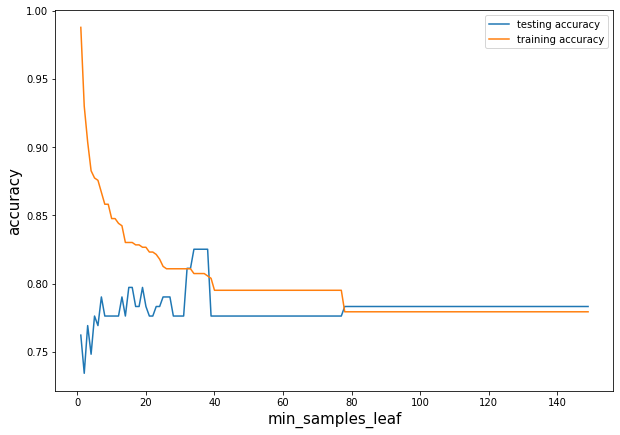

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(leaf, testing_accuracy)
sns.lineplot(leaf, training_accuracy)
plt.legend(['testing accuracy', 'training accuracy'])
plt.xlabel('min_samples_leaf', size=15)
plt.ylabel('accuracy', size=15);

In [ ]:
print('Leaf terbaik =', best_leaf)
print('Nilai akurasi =', score)

Leaf terbaik = 34
Nilai akurasi = 0.8251748251748252


In [ ]:
pd.DataFrame(
    {
        'min_samples_leaf': leaf,
        'train accuracy': training_accuracy,
        'test accuracy': testing_accuracy
    }
)[::5]

,min_samples_leaf,train accuracy,test accuracy
0,1,0.987741,0.762238
5,6,0.875657,0.769231
10,11,0.847636,0.776224
15,16,0.830123,0.797203
20,21,0.823117,0.776224
25,26,0.810858,0.790210
30,31,0.810858,0.776224
35,36,0.807356,0.825175
40,41,0.795096,0.776224
45,46,0.795096,0.776224


## **Interpretasi**

- Minimum samples leaf adalah jumlah sample minimum yang dibutuhkan untuk bisa membentuk satu leaf.
- Sebagai contoh, jika split terakhir menghasilkan 2 node leaf, yang pertama dengan 2 sample, dan yang kedua dengan 6 sample. Apabila min_samples_leaf = 3, maka splitting tidak akan bisa dilakukan karena ada salah satu node yang hanya memiliki 2 sample, meskipun internal node secara keseluruhan memiliki 8 sample.
<br><br>

- Didapat nilai min_samples_leaf terbaik = 34. Artinya, jumlah sample minimum yang dibutuhkan untuk bisa splitting dan membentuk satu leaf adalah 34 sampel. Kalau sisa sample sebelum splitting kurang dari 34, maka splitting berikutnya tidak dapat dilakukan. Dapat dilihat pada plot, min_samples_leaf = 34 memang memiliki nilai akurasi pada data test paling tinggi.
- Pada nilai min_samples_leaf < 30, cenderung terjadi overfitting
- Pada nilai min_samples_leaf > 40, cenderung terjadi underfitting

- Overfitting berarti model tidak dapat menggeneralisasikan data baru dengan baik, sehingga akurasi pada test set menjadi jauh lebih kecil daripada training set. Hal ini bisa disebabkan karena model terlalu kompleks.
